<a href="https://colab.research.google.com/github/NipunS08/MyEngine/blob/main/Covid_Spread_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/cases_deaths/total_cases.csv')
# https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Columns: 247 entries, date to Zimbabwe
dtypes: int64(246), object(1)
memory usage: 3.2+ MB


In [ ]:
df.head()

,date,World,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-05,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-06,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-07,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-08,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-09,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.set_index('date')
df.head()

,World,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-06,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-08,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-09,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='date'>

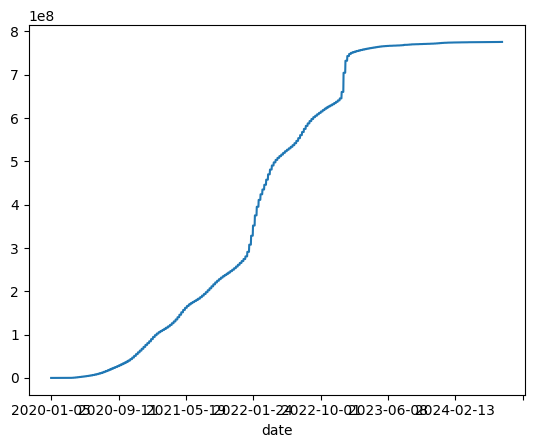

In [ ]:
df['World'].plot()

<Axes: xlabel='date'>

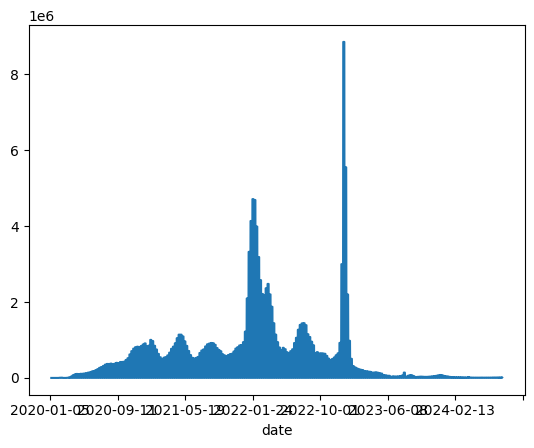

In [ ]:
(
    df
    .World
    .rolling(5)
    .mean()
    .diff()
    .plot()
)

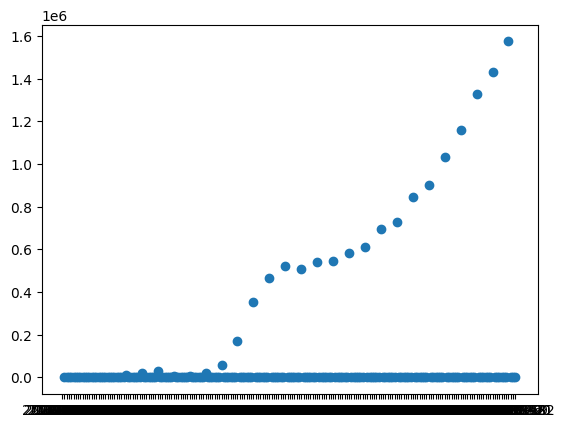

In [ ]:
import matplotlib.pyplot as plt
df_tmp = df.head(200).query('World != 0')
plt.scatter(df_tmp.World.diff().index, df_tmp.World.diff())

<Axes: xlabel='date'>

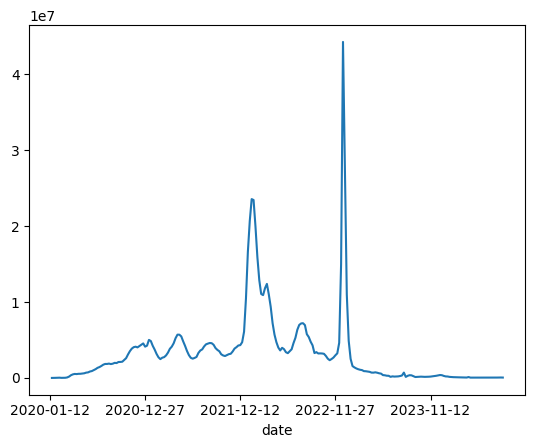

In [ ]:
ts = df.loc[
    df.World.diff() >0
].World.diff()
ts.plot()

,World
date,
2020-07-23,14159991
2020-07-24,14159991
2020-07-25,14159991
2020-07-26,15902862
2020-07-27,15902862
2020-07-28,15902862
2020-07-29,15902862
2020-07-30,15902862
2020-07-31,15902862


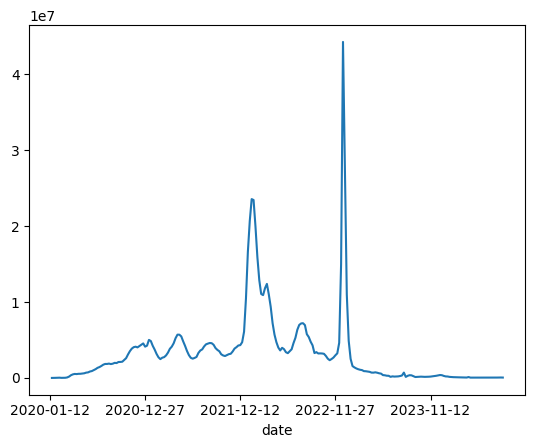

In [ ]:
def get_daily_cases_from_cumulative(cumulative_cases):
    daily_cases = cumulative_cases[cumulative_cases.diff() > 0].diff()
    return daily_cases

daily_cases = get_daily_cases_from_cumulative(df.World)
daily_cases.plot()
df.World.iloc[200:230]

In [ ]:
# # prompt: given a timeseries, locate the local minima such that their value if at maximum 60% of their last local maxima

# import numpy as np

# def find_local_minima(timeseries):
#   """Finds local minima in a time series.

#   Args:
#     timeseries: A NumPy array containing the time series data.

#   Returns:
#     A list of indices of local minima.
#   """

#   # Calculate the first derivative of the time series.
#   derivative = np.gradient(timeseries)

#   # Find the indices where the derivative changes sign from positive to negative.
#   minima_indices = np.where(np.diff(np.sign(derivative)) == -2)[0]

#   # Filter out minima that are not at least 60% of the last local maxima.
#   maxima_indices = find_local_maxima(timeseries)
#   filtered_minima_indices = []
#   for minimum_index in minima_indices:
#     maxima_before_minimum = timeseries[maxima_indices[maxima_indices < minimum_index]]
#     if not maxima_before_minimum.any() or timeseries[minimum_index] < 0.6 * maxima_before_minimum.max():
#       filtered_minima_indices.append(minimum_index)

#   return filtered_minima_indices

# def find_local_maxima(timeseries):
#   """Finds local maxima in a time series.

#   Args:
#     timeseries: A NumPy array containing the time series data.

#   Returns:
#     A list of indices of local maxima.
#   """

#   # Calculate the first derivative of the time series.
#   derivative = np.gradient(timeseries)

#   # Find the indices where the derivative changes sign from negative to positive.
#   maxima_indices = np.where(np.diff(np.sign(derivative)) == 2)[0]

#   return maxima_indices

# # Find the local minima in the time series.
# minima_indices = find_local_minima(ts)

# # Print the indices of the local minima.
# print("minima Indeces:", minima_indices)

# # Find the local minima in the time series.
# maxima_indices = find_local_maxima(ts)

# # Print the indices of the local minima.
# print("maxima Indeces:", maxima_indices)


In [ ]:
# ts.plot()
# plt.scatter(ts.iloc[minima_indices].index, ts.iloc[minima_indices].values)

In [ ]:
# ts.iloc[minima_indices]

In [ ]:
# ts.iloc[maxima_indices]

In [ ]:
# minima_indices[1]

In [ ]:
# ts.iloc[minima_indices[0]:minima_indices[1]].plot()

In [ ]:
def findLocalMaximaMinima(arr):
    n = len(arr)

    # Empty lists to store points of
    # local maxima and minima
    mx = []
    mn = []

    # Checking whether the first point is
    # local maxima or minima or neither
    if(arr[0] > arr[1]):
        mx.append(0)
    elif(arr[0] < arr[1]):
        mn.append(0)

    # Iterating over all points to check
    # local maxima and local minima
    for i in range(1, n-1):

        # Condition for local minima
        if(arr[i-1] > arr[i] < arr[i + 1]):
            mn.append(i)

        # Condition for local maxima
        elif(arr[i-1] < arr[i] > arr[i + 1]):
            mx.append(i)

    # Checking whether the last point is
    # local maxima or minima or neither
    if(arr[-1] > arr[-2]):
        mx.append(n-1)
    elif(arr[-1] < arr[-2]):
        mn.append(n-1)

        # Print all the local maxima and
        # local minima indexes stored
    if(len(mx) > 0):
        print("Points of Local maxima"
            " are : ", end ='')
        print(*mx)
    else:
        print("There are no points of"
            " Local maxima.")

    if(len(mn) > 0):
        print("Points of Local minima"
            " are : ", end ='')
        print(*mn)
    else:
        print("There are no points" " of Local minima.")
    return mx, mn

N = 9
# Given array arr[]
arr = [10, 20, 15, 14, 13, 25, 5, 4, 3]

# Function Call
function_return = findLocalMaximaMinima(arr)
print(function_return)

Points of Local maxima are : 1 5
Points of Local minima are : 0 4 8
([1, 5], [0, 4, 8])


In [ ]:
local_max, local_min = findLocalMaximaMinima(
    arr=ts.values
)

Points of Local maxima are : 5 13 29 31 34 45 49 52 67 84 106 114 122 133 140 142 154 171 180 186 189 195 205 220 224 227 234 237
Points of Local minima are : 7 14 30 32 35 46 50 58 75 92 112 121 125 139 141 147 170 179 181 187 192 197 219 223 225 228 235 238


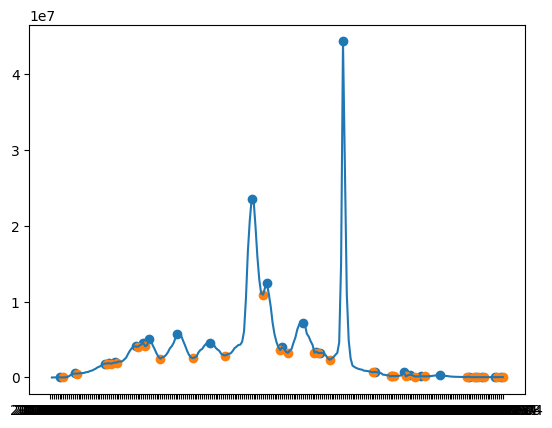

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ts.index, ts.values)
plt.scatter(ts.iloc[local_max].index, ts.iloc[local_max].values)
plt.scatter(ts.iloc[local_min].index, ts.iloc[local_min].values)

In [ ]:
for i, num in enumerate([2,5,4,3]):
    print(i, num)

0 2
1 5
2 4
3 3


In [ ]:
# prompt: provide a function that, given a time series, a list with the index of the local min, a list with the  local max and a percentage threshold, filter the local min and max such that no min is assigned if the min is smaller than the previous or following max is less than 10% higher

def filter_local_min_max(timeseries, local_min_indices, local_max_indices, threshold=0.20):
  """
  Filters local minima and maxima based on a percentage threshold.

  Args:
    timeseries: The time series data.
    local_min_indices: List of indices of local minima.
    local_max_indices: List of indices of local maxima.
    threshold: The percentage threshold (default: 0.10).

  Returns:
    A tuple containing two lists: filtered_local_min_indices and filtered_local_max_indices.
  """

  filtered_local_min_indices = []
  filtered_local_max_indices = []

  for i, min_index in enumerate(local_min_indices):
    # Find the previous and next maxima
    prev_max_index = max([idx for idx in local_max_indices if idx < min_index], default=None)
    next_max_index = min([idx for idx in local_max_indices if idx > min_index], default=None)

    # Check if the previous or next maxima is within the threshold
    if prev_max_index:
        if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
            continue
    if next_max_index:
        if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:
            continue

    # If the conditions are met, add the minimum to the filtered list
    filtered_local_min_indices.append(min_index)

  # No filtering for maxima in this function
  filtered_local_max_indices = local_max_indices

  return filtered_local_min_indices

filtered_local_min_indices = filter_local_min_max(ts, local_min, local_max)
ts.iloc[filtered_local_min_indices]

<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


,World
date,
2020-03-01,8268.0
2021-02-21,2474264.0
2021-06-20,2537142.0
2021-10-17,2883607.0
2022-06-05,3259098.0
2022-11-06,2334637.0
2023-06-18,142924.0
2023-08-13,133936.0
2023-09-17,120577.0


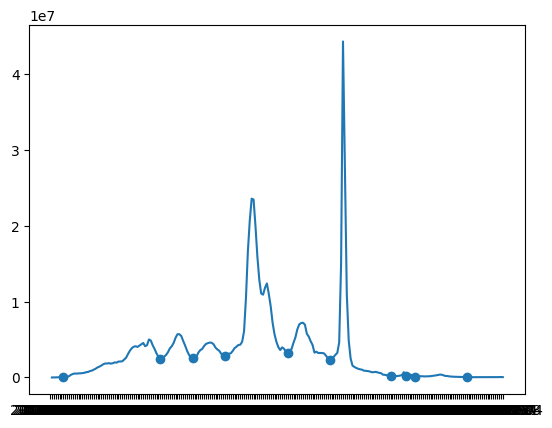

In [ ]:
plt.plot(ts.index, ts.values)
plt.scatter(ts.iloc[filtered_local_min_indices].index, ts.iloc[filtered_local_min_indices].values)

Points of Local maxima are : 5 13 29 31 34 45 49 52 67 84 106 114 122 133 140 142 154 171 180 186 189 195 205 220 224 227 234 237
Points of Local minima are : 7 14 30 32 35 46 50 58 75 92 112 121 125 139 141 147 170 179 181 187 192 197 219 223 225 228 235 238


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


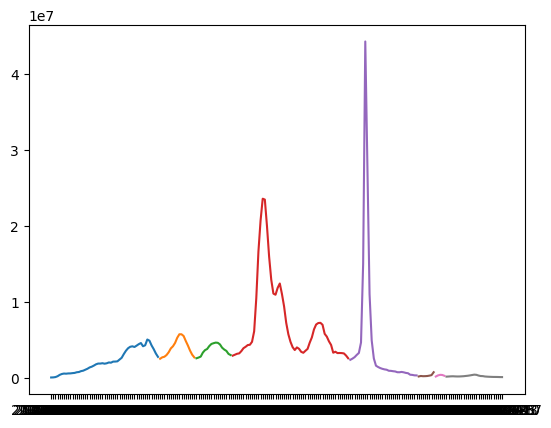

In [ ]:
def separate_waves(time_series, threshold=.3):
    local_max, local_min = findLocalMaximaMinima(
        arr=time_series.values
    )
    filtered_local_min_indices = filter_local_min_max(
        time_series, local_min, local_max, threshold
    )
    waves = []
    for i in range(len(filtered_local_min_indices)-1):
        waves.append(time_series.iloc[filtered_local_min_indices[i]:filtered_local_min_indices[i+1]])
    append_next = False
    for i, wave in enumerate(waves):
        if len(wave) < 5:
            if i == 0:
              append_next = True
            else:
              waves[i-1] = pd.concat([waves[i-1], wave])
            waves.pop(i)
            append_next = False
        if append_next:
            waves[i] = pd.concat([waves[i-1], wave])
    return waves

waves = separate_waves(ts)

for i, wave in enumerate(waves):
    plt.plot(wave.index, wave.values)

In [ ]:
import pandas as pd
import numpy as np

def calculate_sir(daily_new_cases, N, recovery_days=10):
    """
    Calculate the SIR model components from daily new infection data.

    Parameters:
    - data: Pandas Series with cumulative infection counts indexed by date.
    - N: Total population size.
    - recovery_days: Days after which an infected person is considered recovered.
    - smoothing_window: Window size for smoothing the daily new cases.

    Returns:
    - DataFrame with columns 'S', 'I', and 'R'.
    """

    # Calculate recovered (R) by shifting the smoothed daily new cases by the recovery period
    recovered = daily_new_cases.shift(recovery_days).fillna(0).cumsum()

    # Calculate susceptible (S) as total population minus cumulative cases (data) and recovered
    susceptible = N - daily_new_cases - recovered

    # Create a DataFrame to store S, I, R
    sir_df = pd.DataFrame({
        'S': susceptible,
        'I': daily_new_cases,
        'R': recovered
    })

    return sir_df

# Example usage:
# Assuming 'cumulative_cases' is a Pandas Series with the cumulative number of cases indexed by date
# N is the total population size
daily_new_cases = pd.Series({
    pd.Timestamp('2024-01-01'): 100,
    pd.Timestamp('2024-01-02'): 120,
    pd.Timestamp('2024-01-03'): 150,
    pd.Timestamp('2024-01-04'): 120,
    pd.Timestamp('2024-01-05'): 10,
    # Add more dates as needed to visualize
})

N = 200  # Example population size
recovery_days = 2  # Recovery period in days
smoothing_window = 2  # Smoothing window size

sir_df = calculate_sir(daily_new_cases, N, recovery_days)
sir_df

,S,I,R
2024-01-01,100.0,100,0.0
2024-01-02,80.0,120,0.0
2024-01-03,-50.0,150,100.0
2024-01-04,-140.0,120,220.0
2024-01-05,-180.0,10,370.0


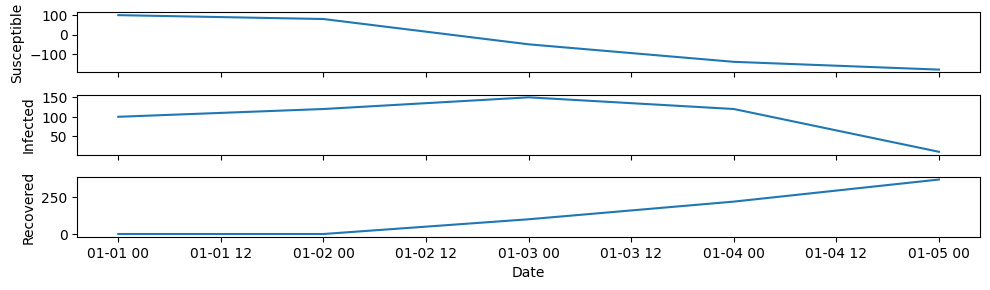

In [ ]:
def plot_sir(sir_df):
    """
    Plot the SIR model components in a single figure as separate subplots vertically aligned.

    Parameters:
    - sir_df: DataFrame with columns 'S', 'I', and 'R'.
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 3), sharex=True)

    # Plot S
    axs[0].plot(sir_df.index, sir_df['S'], label='Susceptible')
    axs[0].set_ylabel('Susceptible')

    # Plot I
    axs[1].plot(sir_df.index, sir_df['I'], label='Infected')
    axs[1].set_ylabel('Infected')

    # Plot R
    axs[2].plot(sir_df.index, sir_df['R'], label='Recovered')
    axs[2].set_ylabel('Recovered')

    # Set common x-axis label
    axs[2].set_xlabel('Date')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_sir(sir_df)


In [ ]:
brazil_ts = get_daily_cases_from_cumulative(df["Brazil"])
brazil_ts

,Brazil
date,
2020-03-01,NaN
2020-03-08,12.0
2020-03-15,71.0
2020-03-22,820.0
2020-03-29,2513.0
...,...
2023-04-16,38838.0
2023-04-23,49140.0
2023-04-30,42186.0


Points of Local maxima are : 18 22 24 27 29 35 42 46 48 56 64 69 73 82 86 89 91 100 115 119 122 124 126 133 135 139 146 157 159 162 164
Points of Local minima are : 20 23 25 28 33 36 44 47 51 60 65 72 81 85 88 90 95 112 116 120 123 125 132 134 137 140 156 158 161 163 167


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


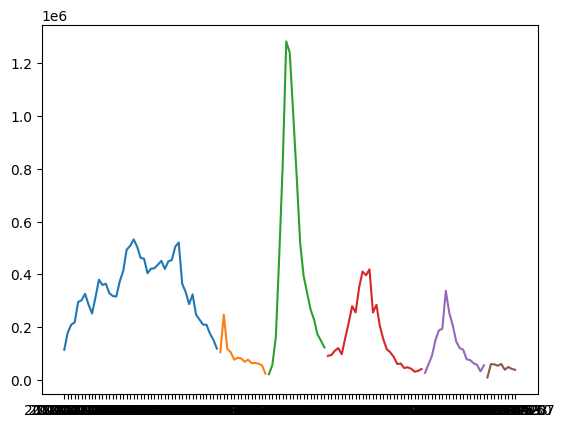

In [ ]:
waves = separate_waves(brazil_ts)
for i, wave in enumerate(waves):
    plt.plot(wave.index, wave.values)

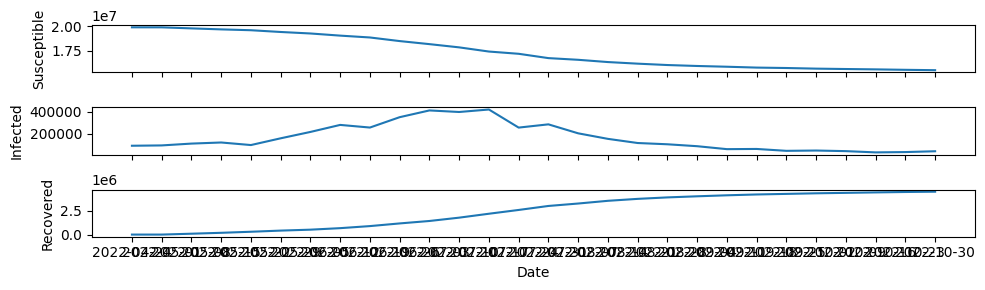

In [ ]:
example_wave = waves[3]
sir_df = calculate_sir(
    daily_new_cases=example_wave,
    N=200*10**5, # Brazilian population around 200 million
    recovery_days=2, # supposing 10 days to get recovered
)
plot_sir(sir_df)

In [ ]:
sir_df

,S,I,R
date,,,
2022-04-24,19908605.0,91395.0,0.0
2022-05-01,19905655.0,94345.0,0.0
2022-05-08,19797739.0,110866.0,91395.0
2022-05-15,19693429.0,120831.0,185740.0
2022-05-22,19605720.0,97674.0,296606.0
2022-05-29,19423831.0,158732.0,417437.0
2022-06-05,19268555.0,216334.0,515111.0
2022-06-12,19046295.0,279862.0,673843.0
2022-06-19,18853789.0,256034.0,890177.0


In [ ]:
# prompt: consider a the case of an SIR model where we have th values for S, I and R for all the instants in a dataframe as a row per day and a column with S, another with I and another with R. create a function that estimates the values of the infection rate beta and the recovery rate gamma

def estimate_sir_parameters(sir_df):
  """
  Estimates the infection rate (beta) and recovery rate (gamma)
  from an SIR model dataframe.

  Args:
    sir_df: DataFrame with columns 'S', 'I', and 'R'.

  Returns:
    A tuple containing the estimated beta and gamma values.
  """

  # Calculate the changes in S, I, and R over time
  delta_S = sir_df['S'].diff()
  delta_I = sir_df['I'].diff()
  delta_R = sir_df['R'].diff()

  # Calculate beta (infection rate)
  beta = -delta_S.iloc[1:] / (sir_df['S'].iloc[:-1] * sir_df['I'].iloc[:-1])
  sir_df['beta'] = beta
#   beta = np.nan_to_num(beta)  # Replace NaN with 0
#   beta = np.mean(beta)

  # Calculate gamma (recovery rate)
  gamma = delta_R.iloc[1:] / sir_df['I'].iloc[:-1]
  sir_df['gamma'] = gamma
#   gamma = np.nan_to_num(gamma)  # Replace NaN with 0
#   gamma = np.mean(gamma)

  return sir_df


In [ ]:
sir_df = estimate_sir_parameters(sir_df)
sir_df

,S,I,R,beta,gamma
date,,,,,
2022-04-24,19908605.0,91395.0,0.0,NaN,NaN
2022-05-01,19905655.0,94345.0,0.0,1.570821e-09,0.000000
2022-05-08,19797739.0,110866.0,91395.0,4.916679e-08,0.824374
2022-05-15,19693429.0,120831.0,185740.0,4.383553e-08,0.780801
2022-05-22,19605720.0,97674.0,296606.0,4.580178e-08,1.135062
2022-05-29,19423831.0,158732.0,417437.0,5.899389e-08,0.761226
2022-06-05,19268555.0,216334.0,515111.0,3.725035e-08,0.451496
2022-06-12,19046295.0,279862.0,673843.0,4.169720e-08,0.567180
2022-06-19,18853789.0,256034.0,890177.0,3.987934e-08,0.844942


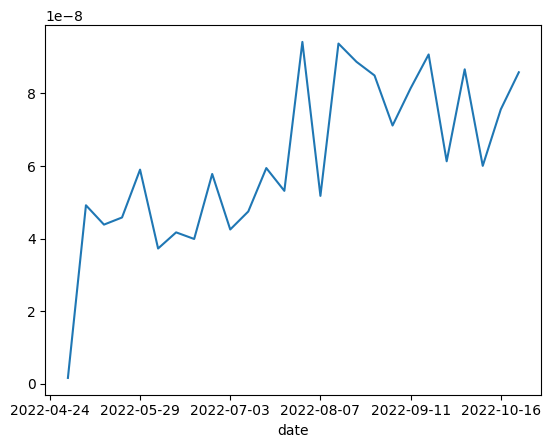

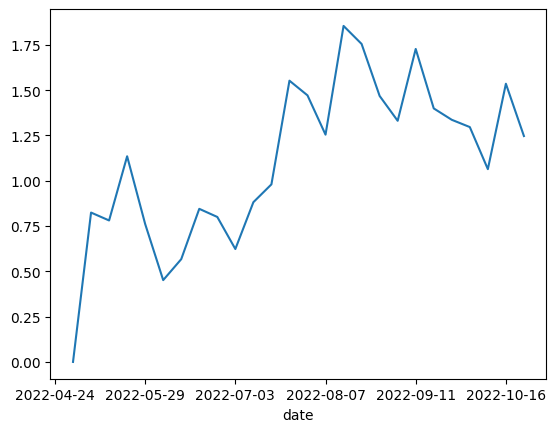

In [ ]:
sir_df.beta.plot()
plt.show()
sir_df.gamma.plot()
plt.show()

In [ ]:
sir_df.iloc[1:int(len(sir_df)/2)].mean()

,0
S,1.881695e+07
I,2.436177e+05
R,9.394298e+05
beta,4.450111e-08
gamma,7.847815e-01


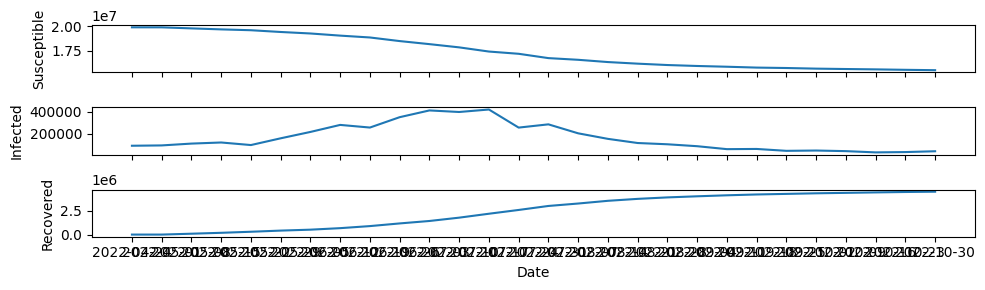

In [ ]:
plot_sir(sir_df)

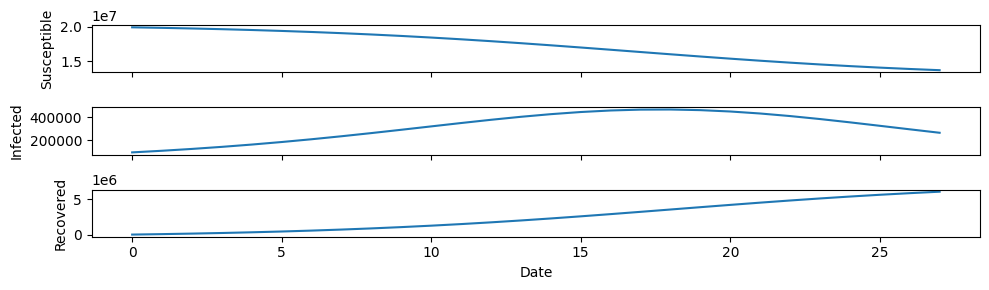

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SIR model equations
def SIR_model(y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def simulate_sir_model(sir_df, gamma, beta):
    """
    Initial conditions (such as S0, I0, and R0) are not to be random but I hardcoded them with specific values. These choices are typically made based on the characteristics of the disease being modeled and the context of the simulation. Initial condition are set such that S0 = 99%, which indicates the proportion of susceptible individuals when the simulation starts. I0 is set to 1%, which indicates proportion of infected individuals to be 1% when the simulation starts. R0 is set to 0% which is expected that there are are no recovered individuals when the simulations start.
    """

    # Time vector
    t = np.linspace(0, 1, len(sir_df))

    sir_df_sim = sir_df.reset_index().copy()

    for j, row in sir_df_sim.iterrows():
        if j == 0:
            s = row.S
            i = row.I
            r = row.R
        else:
            dSdt, dIdt, dRdt = SIR_model([s, i, r], beta, gamma)
            s += dSdt
            i += dIdt
            r += dRdt

        sir_df_sim.loc[j, 'S'] = s
        sir_df_sim.loc[j, 'I'] = i
        sir_df_sim.loc[j, 'R'] = r

    return sir_df_sim

beta = 4.3*(10**-8)
gamma = .7

sir_df_sim = simulate_sir_model(sir_df, gamma, beta)
plot_sir(sir_df_sim)

In [ ]:
#separate 5 countries
#get the mean gamma and beta
#simulate the sir model for the first 5 waves and the for the following ones
#calculate the error in the peak of each wave (in time and in number) and for the end of the wave (in time for the same numerical number of the end of the wave)


In [ ]:
#5 countries
countries = ['Brazil', 'United States', 'India', 'China', 'Russia', 'Canada']
df_countries = df[countries]
df_countries.head()


,Brazil,United States,India,China,Russia,Canada
date,,,,,,
2020-01-05,0,0,0,1,0,0
2020-01-06,0,0,0,1,0,0
2020-01-07,0,0,0,1,0,0
2020-01-08,0,0,0,1,0,0
2020-01-09,0,0,0,1,0,0


<Axes: xlabel='date'>

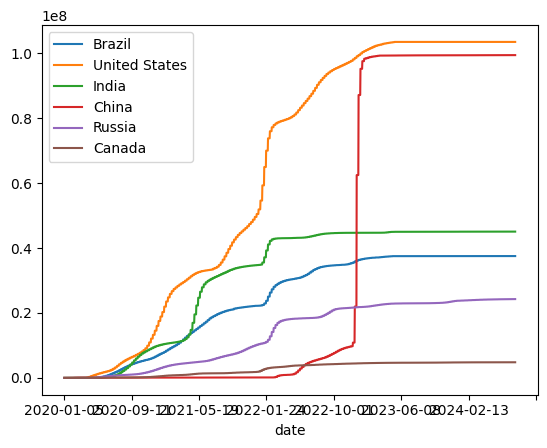

In [ ]:
df_countries.plot()

In [ ]:
sir_df

,S,I,R,beta,gamma
date,,,,,
2022-04-24,19908605.0,91395.0,0.0,NaN,NaN
2022-05-01,19905655.0,94345.0,0.0,1.570821e-09,0.000000
2022-05-08,19797739.0,110866.0,91395.0,4.916679e-08,0.824374
2022-05-15,19693429.0,120831.0,185740.0,4.383553e-08,0.780801
2022-05-22,19605720.0,97674.0,296606.0,4.580178e-08,1.135062
2022-05-29,19423831.0,158732.0,417437.0,5.899389e-08,0.761226
2022-06-05,19268555.0,216334.0,515111.0,3.725035e-08,0.451496
2022-06-12,19046295.0,279862.0,673843.0,4.169720e-08,0.567180
2022-06-19,18853789.0,256034.0,890177.0,3.987934e-08,0.844942


In [ ]:
countries_ts = pd.concat([get_daily_cases_from_cumulative(df_countries[country]) for country in countries], axis=1)
countries_ts

#brazil_ts = get_daily_cases_from_cumulative(df["Brazil"])


,Brazil,United States,India,China,Russia,Canada
date,,,,,,
2020-03-01,NaN,33.0,NaN,2926.0,NaN,6.0
2020-03-08,12.0,391.0,32.0,891.0,5.0,36.0
2020-03-15,71.0,3465.0,68.0,189.0,27.0,125.0
2020-03-22,820.0,27486.0,253.0,450.0,272.0,795.0
2020-03-29,2513.0,94894.0,619.0,843.0,1228.0,3704.0
...,...,...,...,...,...,...
2024-07-28,NaN,NaN,243.0,2103.0,6148.0,327.0
2024-08-04,NaN,NaN,313.0,2087.0,7777.0,38.0
2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN


Points of Local maxima are : 18 22 24 27 29 35 42 46 48 56 64 69 73 82 86 89 91 100 115 119 122 124 126 133 135 139 146 157 159 162 164
Points of Local minima are : 20 23 25 28 33 36 44 47 51 60 65 72 81 85 88 90 95 112 116 120 123 125 132 134 137 140 156 158 161 163
Points of Local maxima are : 6 8 21 27 30 38 42 45 59 67 71 79 81 87 90 98 117 119 122 126 138 141 145 147 149 156 161 163 170
Points of Local minima are : 0 7 13 26 28 31 39 43 55 66 68 72 80 86 88 91 108 118 120 123 137 139 142 146 148 155 159 162 166 171
Points of Local maxima are : 29 36 39 62 74 79 99 114 125 133 148 164 182 184 187 190 193 195 206 216 223 231 233
Points of Local minima are : 35 38 50 73 77 95 111 116 132 146 152 180 183 185 188 192 194 198 212 220 229 232 234
Points of Local maxima are : 0 4 7 11 16 22 29 36 40 47 52 54 57 61 65 75 81 88 96 98 105 117 133 136 147 153 158 167 171 174 176 179 183 188 192 201 207 210 213 216 220 224 234 238
Points of Local minima are : 2 6 10 12 18 28 30 38 43 51 53 56 

<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) >

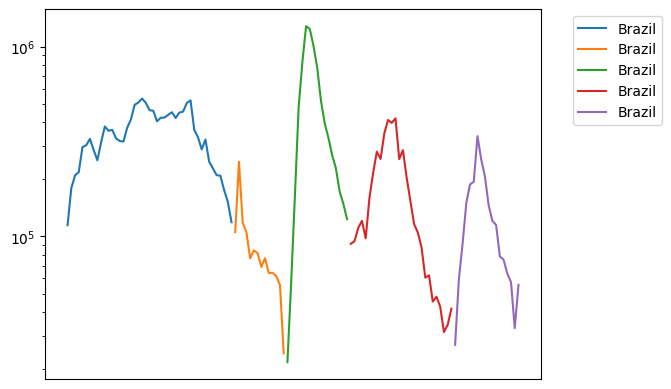

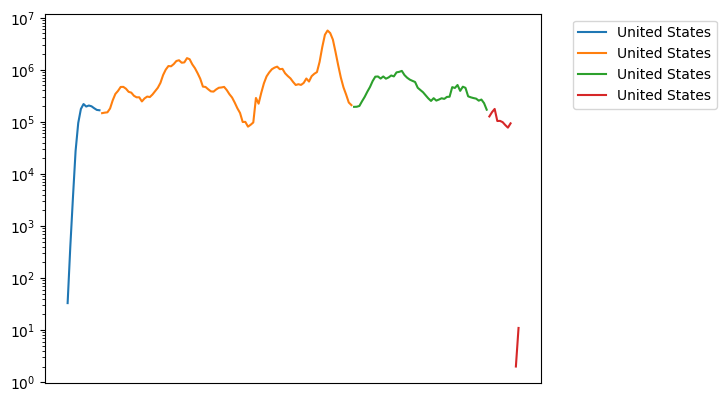

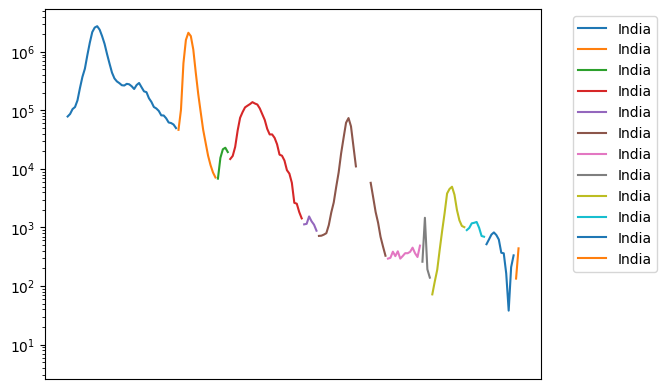

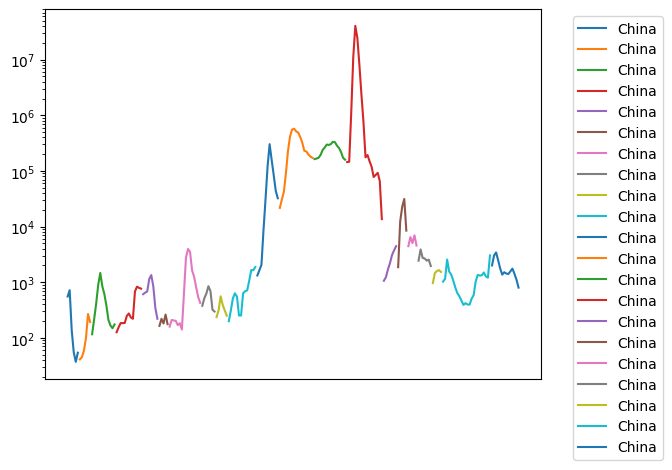

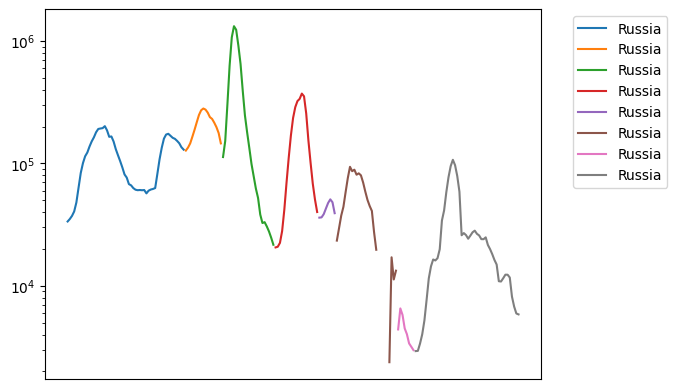

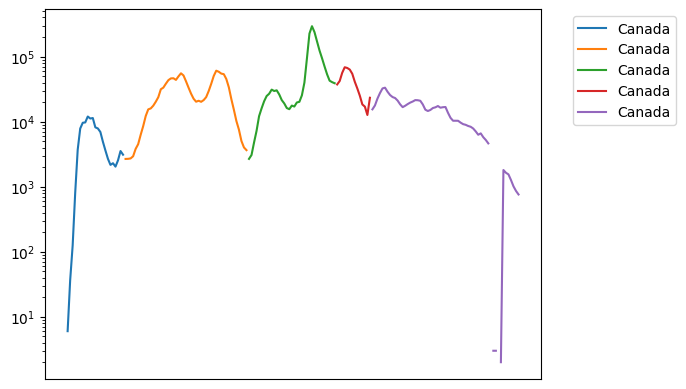

In [ ]:
idx = []

waves = {country: separate_waves(countries_ts[country]) for country in countries}
for country in countries:
    for i, wave in enumerate(waves[country]):
        plt.plot(wave.index, wave.values, label=country)
    plt.legend()
    plt.xticks(idx[::8], rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right', va='top')
    plt.yscale('log')
    plt.show()

Points of Local maxima are : 18 22 24 27 29 35 42 46 48 56 64 69 73 82 86 89 91 100 115 119 122 124 126 133 135 139 146 157 159 162 164
Points of Local minima are : 20 23 25 28 33 36 44 47 51 60 65 72 81 85 88 90 95 112 116 120 123 125 132 134 137 140 156 158 161 163 167


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


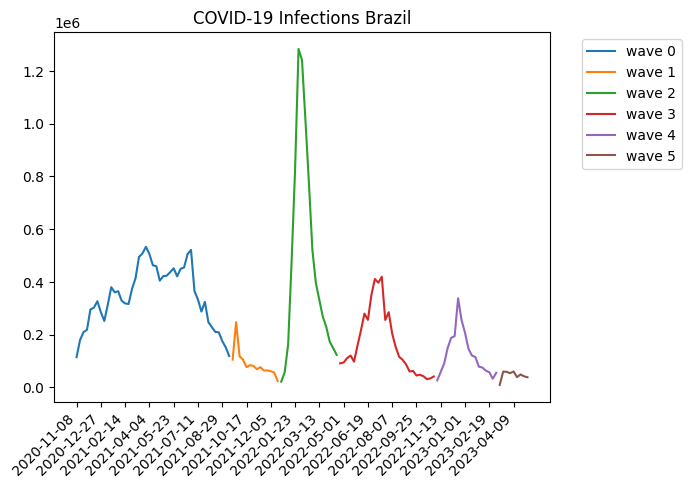

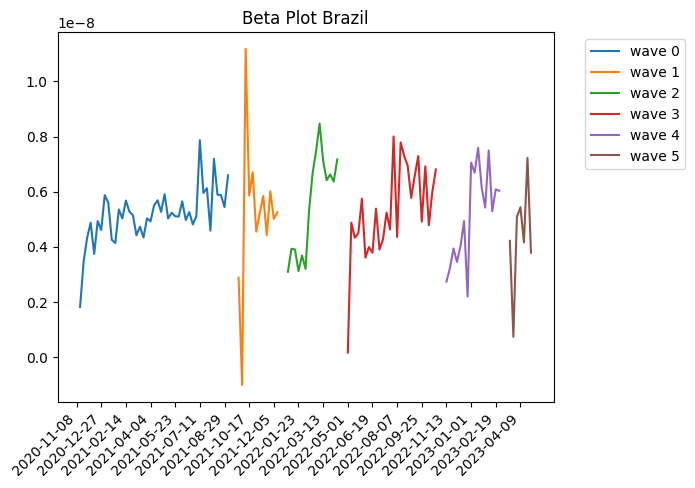

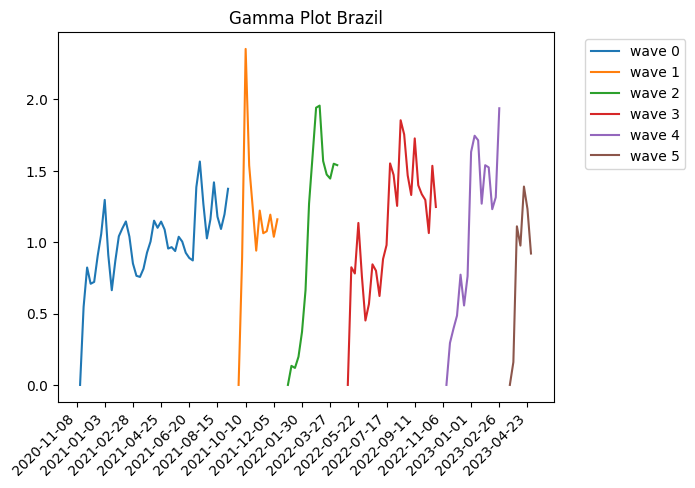

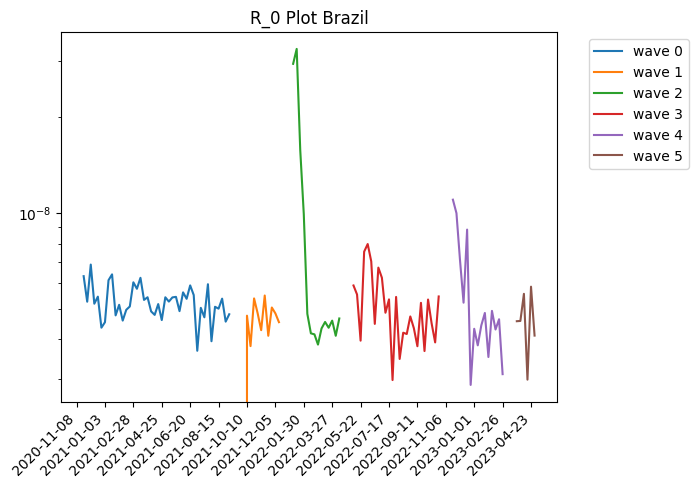

In [ ]:
#check 5 coutnries countries = ['Brazil', 'United States', 'India', 'China', 'Russia']

brazil_ts = get_daily_cases_from_cumulative(df["Brazil"])
waves = separate_waves(brazil_ts)
idx = []

#sample one wave - check "all the waves"
# example_wave = waves[3]

# WE ARE USING WEEKLY DATA!!! SO EVEN IF WE ARE SAYING DAILY_CASES, ITS ACTUALY WEEKLY


for i, wave in enumerate(waves):
    idx.extend(wave.index.to_list())
    plt.plot(wave.index, wave, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::7], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("COVID-19 Infections Brazil")
plt.show()




idx = []
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=200*10**6, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::7], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Beta Plot Brazil")
plt.show()
    # sir_df.gamma.plot()
    # plt.show()

idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=200*10**6, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::8], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Gamma Plot Brazil")
plt.show()


idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=200*10**6, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta/sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::8], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("R_0 Plot Brazil")
plt.yscale('log')
plt.show()

Points of Local maxima are : 30 37 40 63 75 80 100 115 126 134 149 165 178 180 183 186 189 191 202 212 219 227 229 231
Points of Local minima are : 36 39 51 74 78 96 112 117 133 147 153 176 179 181 184 188 190 194 208 216 225 228 230


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


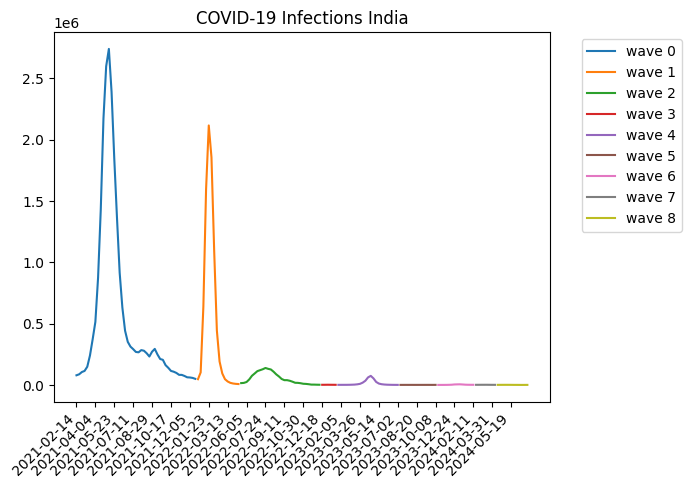

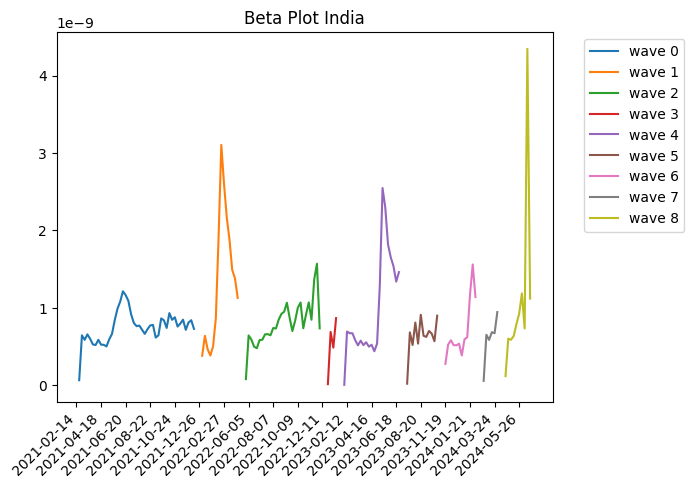

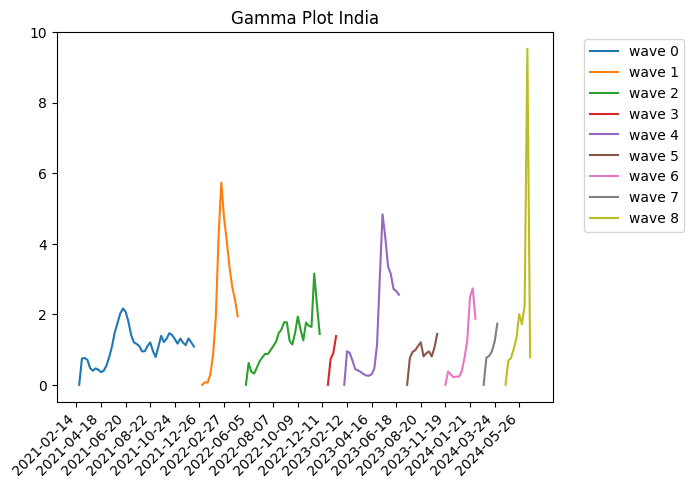

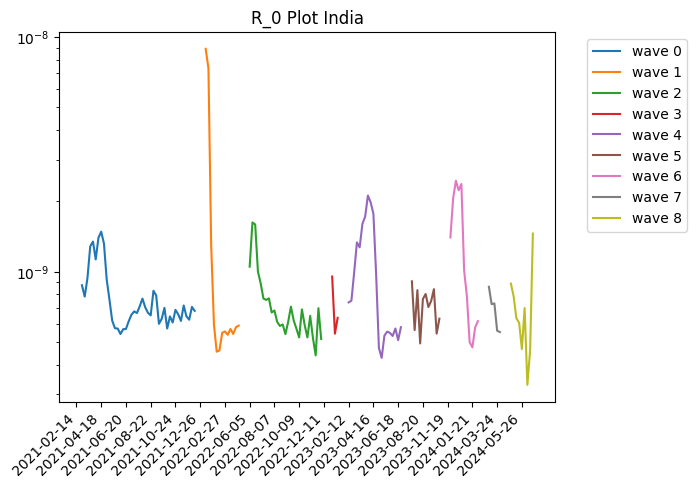

In [ ]:
#check 5 coutnries countries = ['Brazil', 'United States', 'India', 'China', 'Russia']

ts = get_daily_cases_from_cumulative(df["India"])
waves = separate_waves(ts)
waves = [w for w in waves if len(w) > 5]
idx = []

#sample one wave - check "all the waves"
# example_wave = waves[3]

# WE ARE USING WEEKLY DATA!!! SO EVEN IF WE ARE SAYING DAILY_CASES, ITS ACTUALY WEEKLY
for i, wave in enumerate(waves):
    idx.extend(wave.index.to_list())
    plt.plot(wave.index, wave, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::7], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("COVID-19 Infections India")
plt.show()




idx = []

for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.429*10**9, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::9], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Beta Plot India")
plt.show()
    # sir_df.gamma.plot()
    # plt.show()


idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.411*10**9, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::9], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Gamma Plot India")
plt.show()


idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.411*10**9, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta/sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::9], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("R_0 Plot India")
plt.yscale('log')
plt.show()

Points of Local maxima are : 5 11 14 18 23 29 36 43 47 54 59 61 64 68 72 82 88 95 103 105 112 124 140 143 154 160 165 174 176 178 181 185 190 194 203 209 212 215 218 222 226 237
Points of Local minima are : 9 13 17 19 25 35 37 45 50 58 60 63 67 69 79 86 92 104 106 117 134 141 150 159 163 168 175 177 180 184 187 192 202 205 210 214 216 221 224 230 238


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


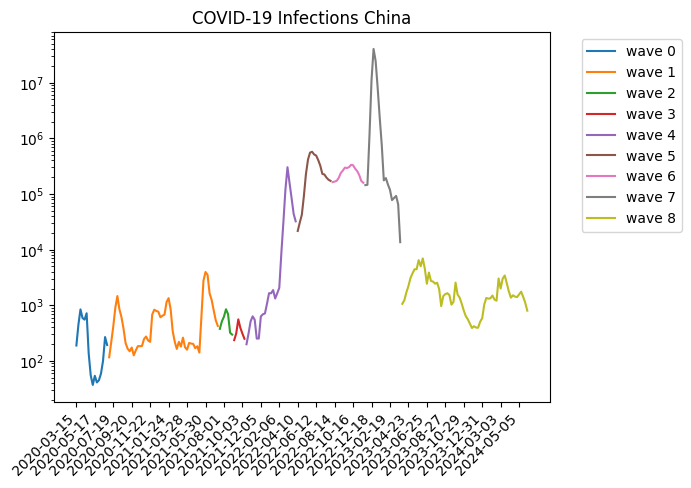

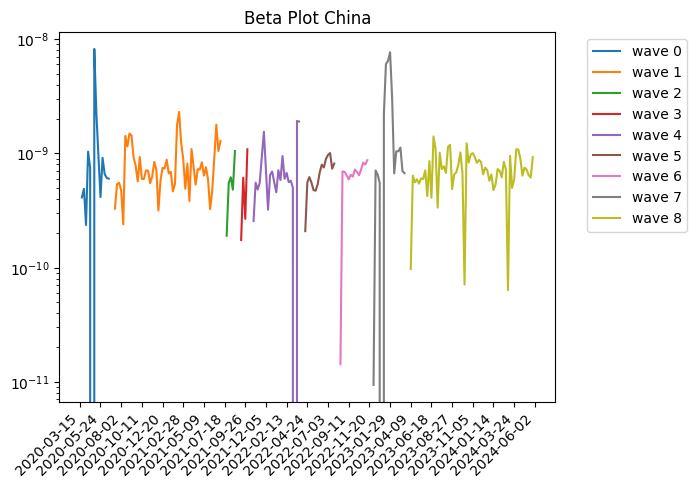

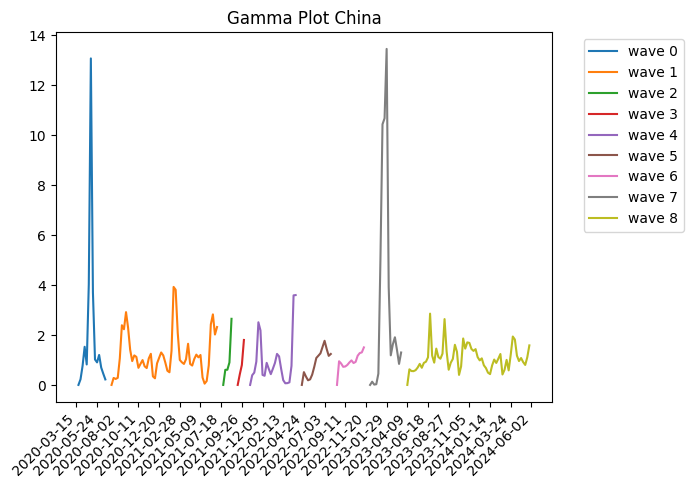

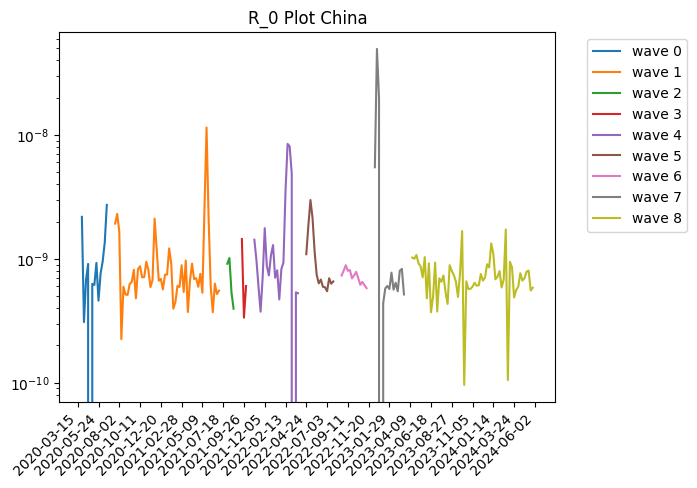

In [ ]:
#check 5 coutnries countries = ['Brazil', 'United States', 'India', 'China', 'Russia']

ts = get_daily_cases_from_cumulative(df["China"])
waves = separate_waves(ts, threshold=0.8)
waves = [w for w in waves if len(w) > 5]
idx = []

#sample one wave - check "all the waves"
# example_wave = waves[3]

# WE ARE USING WEEKLY DATA!!! SO EVEN IF WE ARE SAYING DAILY_CASES, ITS ACTUALY WEEKLY
for i, wave in enumerate(waves):
    idx.extend(wave.index.to_list())
    plt.plot(wave.index, wave, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::9], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("COVID-19 Infections China")
plt.yscale('log')
plt.show()




idx = []

for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.411*10**9, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::10], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Beta Plot China")
plt.yscale('log')
plt.show()
    # sir_df.gamma.plot()
    # plt.show()

idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.411*10**9, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::10], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Gamma Plot China")
plt.show()


idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.411*10**9, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta/sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::10], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("R_0 Plot China")
plt.yscale('log')
plt.show()

Points of Local maxima are : 10 14 43 46 59 61 72 88 102 116 133 146 155 157 159 169 171 173 188 197 202 207 212 221 231
Points of Local minima are : 13 26 45 58 60 62 80 97 115 121 141 149 156 158 168 170 172 180 189 201 204 211 219 228


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


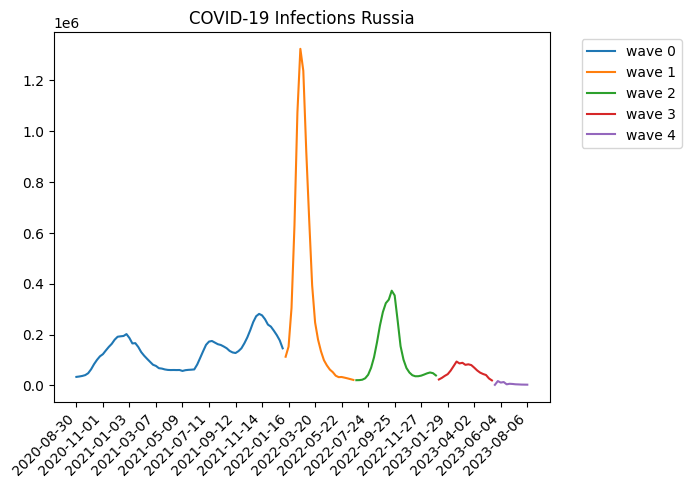

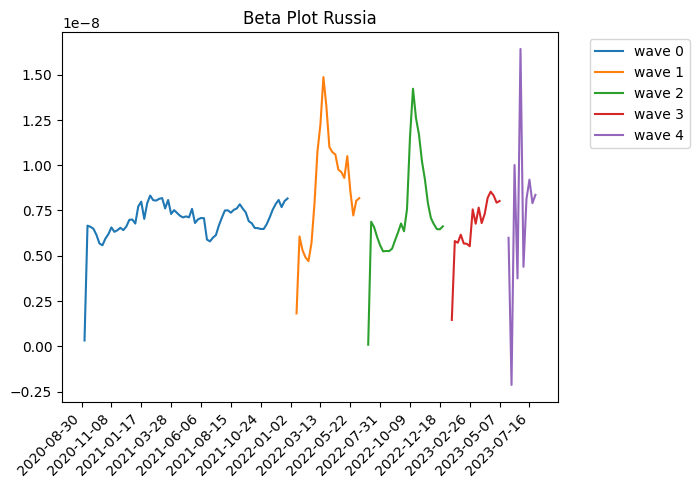

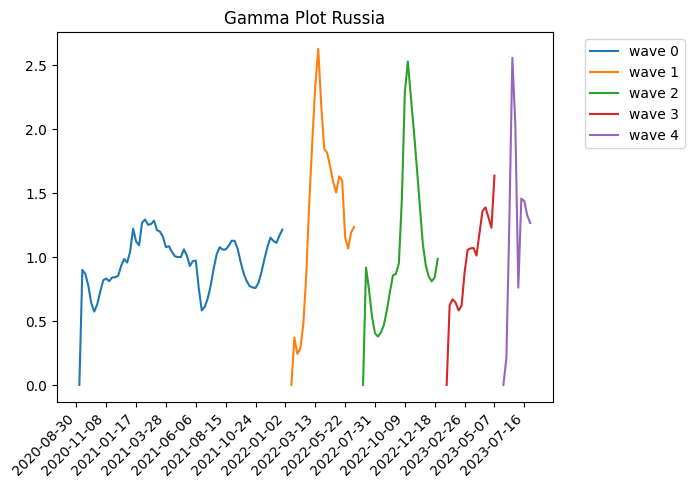

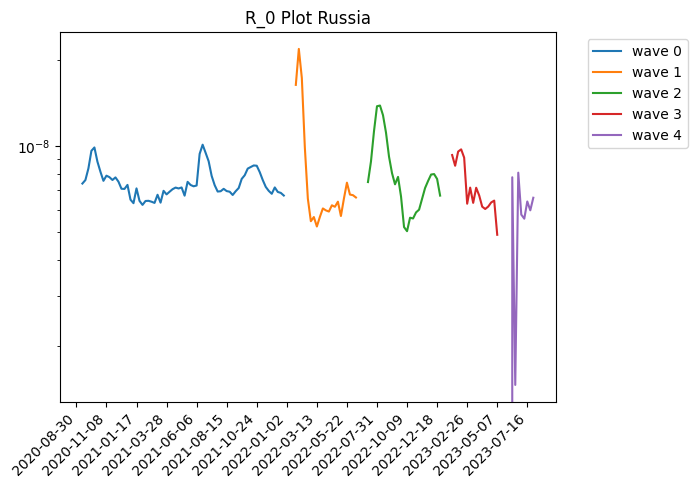

In [ ]:
#check 6 coutnries countries = ['Brazil', 'United States', 'India', 'China', 'Russia', 'Canada']

ts = get_daily_cases_from_cumulative(df["Russia"])
waves = separate_waves(ts, threshold = 0.5)

waves = [w for w in waves if len(w) > 5]
idx = []

#sample one wave - check "all the waves"
# example_wave = waves[3]


for i, wave in enumerate(waves):
    idx.extend(wave.index.to_list())
    plt.plot(wave.index, wave, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::9], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("COVID-19 Infections Russia")
plt.show()

# WE ARE USING WEEKLY DATA!!! SO EVEN IF WE ARE SAYING DAILY_CASES, ITS ACTUALY WEEKLY

idx = []


for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.438*10**8, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::10], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Beta Plot Russia")
plt.show()
    # sir_df.gamma.plot()
    # plt.show()

idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.438*10**8, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::10], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Gamma Plot Russia")
plt.show()


idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=1.438*10**8, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta/sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::10], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("R_0 Plot Russia")
plt.yscale('log')
plt.show()

Points of Local maxima are : 12 14 22 25 46 49 56 63 85 87 93 101 114 124 130 142 151 154 168 191 199 204 215 219 224 230
Points of Local minima are : 3 13 21 23 27 47 55 57 76 86 92 94 111 123 125 137 147 152 167 179 193 203 214 217 220 229 235


<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:
<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:


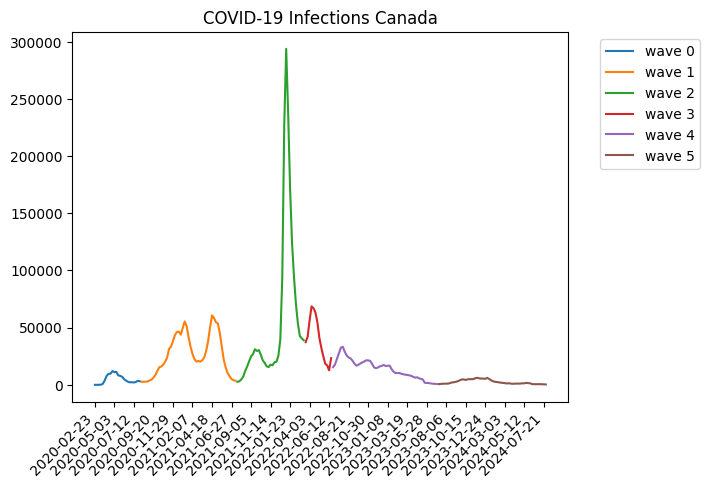

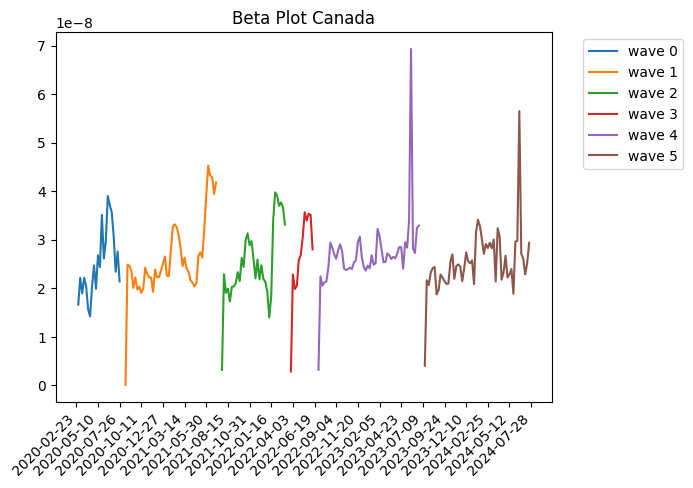

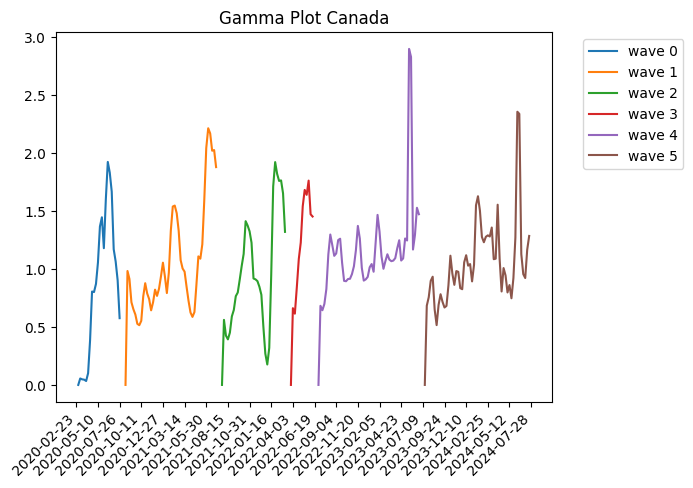

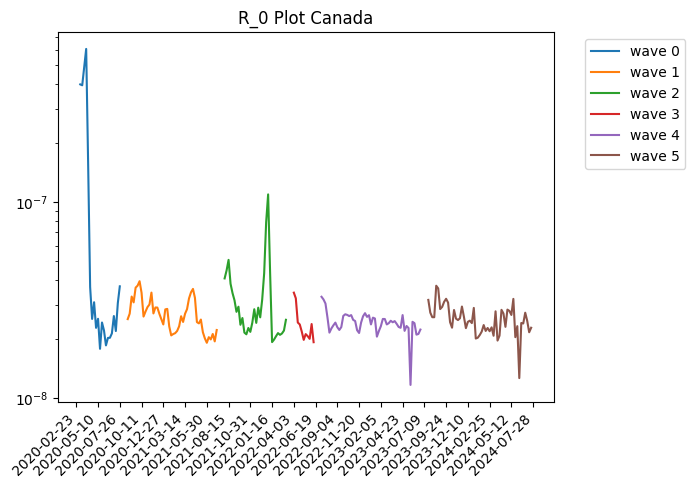

In [ ]:
#check 6 coutnries countries = ['Brazil', 'United States', 'India', 'China', 'Russia', 'Canada']

ts = get_daily_cases_from_cumulative(df["Canada"])
waves = separate_waves(ts)
waves = [w for w in waves if len(w) > 5]
idx = []

#sample one wave - check "all the waves"
# example_wave = waves[3]
for i, wave in enumerate(waves):
    idx.extend(wave.index.to_list())
    plt.plot(wave.index, wave, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::10], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("COVID-19 Infections Canada")
plt.show()
# WE ARE USING WEEKLY DATA!!! SO EVEN IF WE ARE SAYING DAILY_CASES, ITS ACTUALY WEEKLY

idx = []
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=40.1*10**6, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::11], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Beta Plot Canada")
plt.show()
    # sir_df.gamma.plot()
    # plt.show()

idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=40.1*10**6, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::11], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Gamma Plot Canada")
plt.show()


idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=40.1*10**6, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta/sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::11], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("R_0 Plot Canada")
plt.yscale('log')
plt.show()

Points of Local maxima are : 2 11 13 26 32 35 43 47 50 64 72 76 84 86 92 95 103 122 124 127 131 143 146 150 152 154 161 166 168 172
Points of Local minima are : 3 12 18 31 33 36 44 48 60 71 73 77 85 91 93 96 113 123 125 128 142 144 147 151 153 160 164 167 171


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


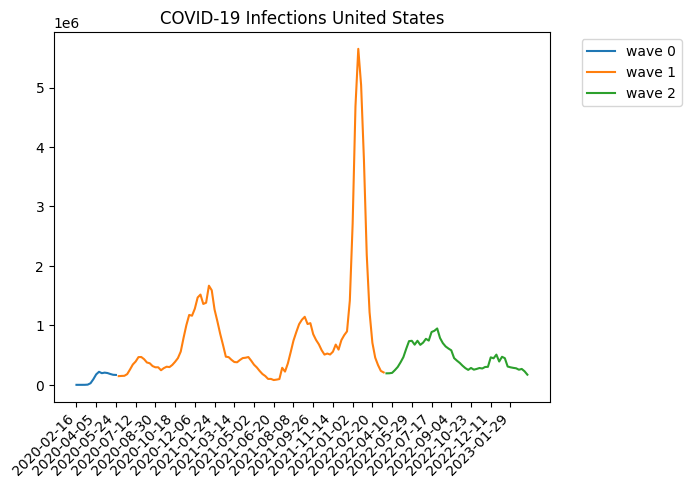

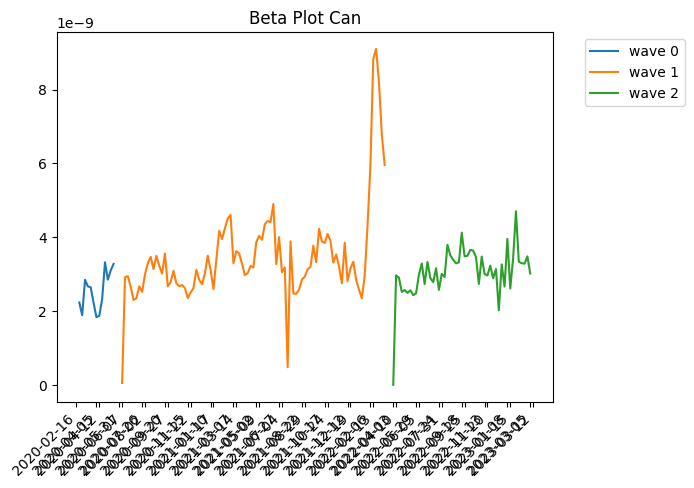

In [ ]:
#check 6 coutnries countries = ['Brazil', 'United States', 'India', 'China', 'Russia', 'Canada']

ts = get_daily_cases_from_cumulative(df["United States"])
waves = separate_waves(ts)
waves = [w for w in waves if len(w) > 5]
idx = []

#sample one wave - check "all the waves"
# example_wave = waves[3]
for i, wave in enumerate(waves):
    idx.extend(wave.index.to_list())
    plt.plot(wave.index, wave, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::7], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("COVID-19 Infections United States")
plt.show()
# WE ARE USING WEEKLY DATA!!! SO EVEN IF WE ARE SAYING DAILY_CASES, ITS ACTUALY WEEKLY


for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=3.349*10**8, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta, label=f"wave {i}")
    # sir_df.beta.plot(
plt.xticks(idx[::8], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Beta Plot Can")
plt.show()
    # sir_df.gamma.plot()
    # plt.show()



Points of Local maxima are : 2 11 13 26 32 35 43 47 50 64 72 76 84 86 92 95 103 122 124 127 131 143 146 150 152 154 161 166 168 172
Points of Local minima are : 3 12 18 31 33 36 44 48 60 71 73 77 85 91 93 96 113 123 125 128 142 144 147 151 153 160 164 167 171
0 219172.0
1 1667151.0
2 5650933.0
3 947983.0


<ipython-input-21-a122afa3a5e2>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[prev_max_index]:
<ipython-input-21-a122afa3a5e2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if timeseries[min_index] * (1 + threshold) > timeseries[next_max_index]:


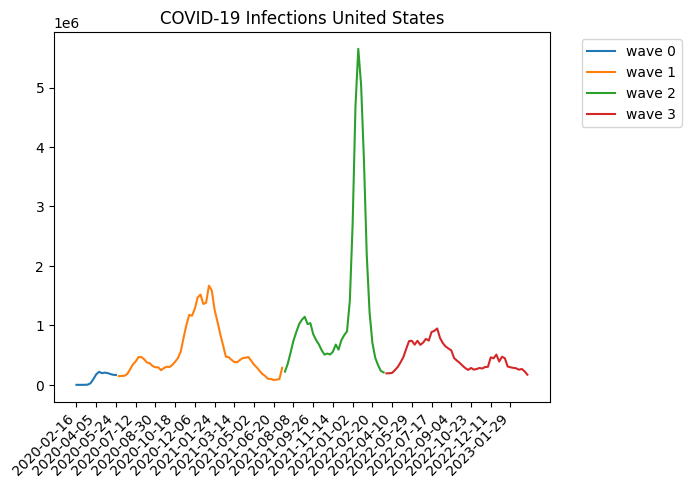

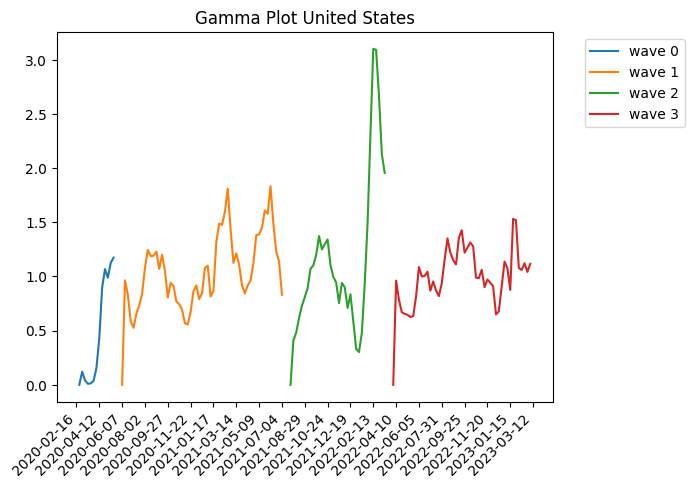

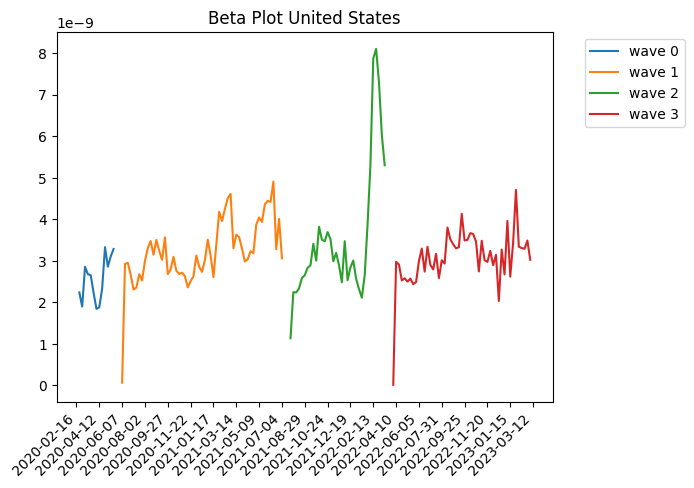

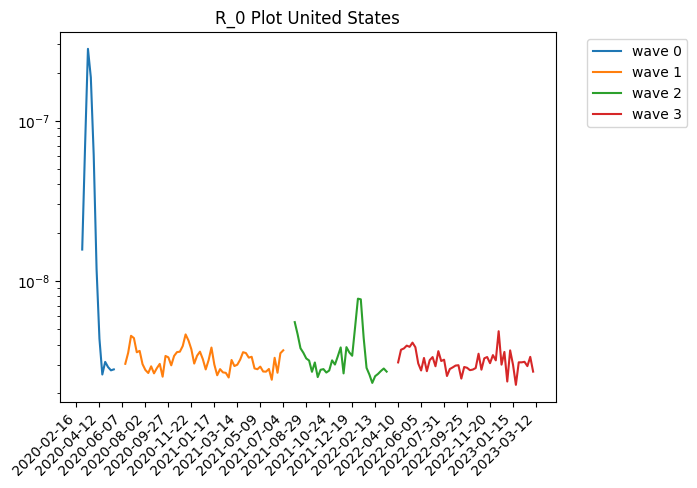

In [ ]:
#check 6 coutnries countries = ['Brazil', 'United States', 'India', 'China', 'Russia', 'Canada']

ts = get_daily_cases_from_cumulative(df["United States"])
waves = separate_waves(ts, threshold = 0.25)
waves = [w for w in waves if len(w) > 5]
idx = []


#sample one wave - check "all the waves"
# example_wave = waves[3]
for i, wave in enumerate(waves):
    idx.extend(wave.index.to_list())
    plt.plot(wave.index, wave, label=f"wave {i}")
    print(i, max(wave))
    # sir_df.beta.plot(
plt.xticks(idx[::7], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("COVID-19 Infections United States")
plt.show()




# WE ARE USING WEEKLY DATA!!! SO EVEN IF WE ARE SAYING DAILY_CASES, ITS ACTUALY WEEKLY

idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=3.349*10**8, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::8], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Gamma Plot United States")
plt.show()
    # sir_df.gamma.plot()
    # plt.show()

idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=3.349*10**8, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::8], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("Beta Plot United States")
plt.show()


idx = []
plt.figure()
for i, wave in enumerate(waves):
    sir_df = calculate_sir(
        daily_new_cases=wave,
        N=3.349*10**8, # Brazilian population around 200 million - YOU WILL NEED TO ADJUST POPULATION FOR EACH COUNTRY
        recovery_days=2, # supposing 2 weeks to get recovered
    )
    sir_df = estimate_sir_parameters(sir_df)
    idx.extend(sir_df.index.to_list())
    plt.plot(sir_df.index, sir_df.beta/sir_df.gamma, label=f"wave {i}")
    # sir_df.gamma.plot(
plt.xticks(idx[::8], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', va='top')
plt.title("R_0 Plot United States")
plt.yscale('log')
plt.show()